<a href="https://colab.research.google.com/github/sheriffdeenabu/DSPL-ICW/blob/main/w1985555_DSPL_ICW_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the CSV
fs_indicators = pd.read_csv('suite-of-food-security-indicators_lka.csv')

In [ ]:
fs_indicators

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,#indicator+name,NaN,NaN,NaN,#date+year,#indicator+type,#indicator+value+num,NaN,NaN
1,LKA,2000-01-01,2002-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,102,E,NaN
2,LKA,2001-01-01,2003-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,103,E,NaN
3,LKA,2002-01-01,2004-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,103,E,NaN
4,LKA,2003-01-01,2005-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,104,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,LKA,2016-01-01,2018-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20162018.0,2018,g/cap/d,44.2,E,NaN
1077,LKA,2017-01-01,2019-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20172019.0,2019,g/cap/d,45,E,NaN
1078,LKA,2018-01-01,2020-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20182020.0,2020,g/cap/d,46.3,E,NaN
1079,LKA,2019-01-01,2021-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20192021.0,2021,g/cap/d,47.6,E,NaN


In [ ]:
fs_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             1081 non-null   object 
 1   StartDate        1081 non-null   object 
 2   EndDate          1081 non-null   object 
 3   Area Code        1080 non-null   float64
 4   Area Code (M49)  1080 non-null   object 
 5   Area             1081 non-null   object 
 6   Item Code        1081 non-null   object 
 7   Item             1081 non-null   object 
 8   Element Code     1080 non-null   float64
 9   Element          1080 non-null   object 
 10  Year Code        1080 non-null   float64
 11  Year             1081 non-null   object 
 12  Unit             1059 non-null   object 
 13  Value            1024 non-null   object 
 14  Flag             1080 non-null   object 
 15  Note             290 non-null    object 
dtypes: float64(3), object(13)
memory usage: 135.3+ KB


In [ ]:
#Find the number of missing values in the dataset
fs_indicators.isnull().sum()

,0
Iso3,0
StartDate,0
EndDate,0
Area Code,1
Area Code (M49),1
Area,0
Item Code,0
Item,0
Element Code,1
Element,1


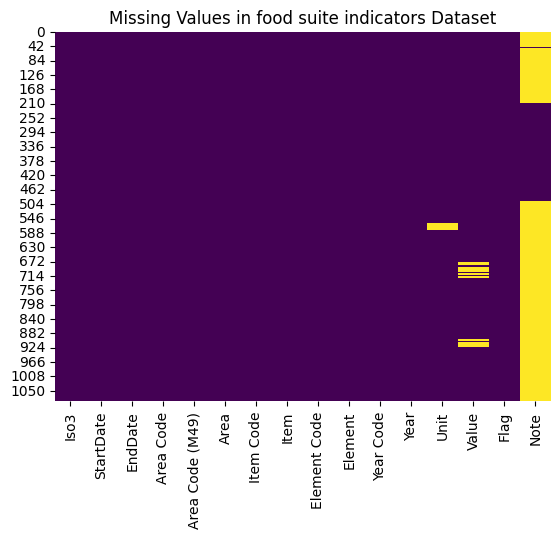

In [ ]:
#Visualising a heatmap to identify missing cells
#We are checking for missing customer values using viridis style
sns.heatmap(fs_indicators.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in food suite indicators Dataset')
plt.show()

In [ ]:
print(fs_indicators.columns)

Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Item Code', 'Item', 'Element Code', 'Element', 'Year Code', 'Year',
       'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')


In [ ]:
#Dropping the note column since majority of it is missing and does not necessarily serve any purpose
fs_indicators = fs_indicators.drop(columns=['Note', 'Area', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Year Code', 'Element Code', 'Item Code', 'Flag'], errors='ignore')
fs_indicators

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,#indicator+name,NaN,NaN,NaN,#date+year,#indicator+type,#indicator+value+num,NaN
1,LKA,2000-01-01,2002-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,102,E
2,LKA,2001-01-01,2003-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,103,E
3,LKA,2002-01-01,2004-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,103,E
4,LKA,2003-01-01,2005-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,104,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,LKA,2016-01-01,2018-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20162018.0,2018,g/cap/d,44.2,E
1077,LKA,2017-01-01,2019-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20172019.0,2019,g/cap/d,45,E
1078,LKA,2018-01-01,2020-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20182020.0,2020,g/cap/d,46.3,E
1079,LKA,2019-01-01,2021-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20192021.0,2021,g/cap/d,47.6,E


In [ ]:
# Remove rows with missing values in specified columns
fs_indicators = fs_indicators.dropna(subset=['Element', 'Iso3'])
fs_indicators

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1,LKA,2000-01-01,2002-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,102,E
2,LKA,2001-01-01,2003-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,103,E
3,LKA,2002-01-01,2004-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,103,E
4,LKA,2003-01-01,2005-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,104,E
5,LKA,2004-01-01,2006-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20042006.0,2006,%,104,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,LKA,2016-01-01,2018-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20162018.0,2018,g/cap/d,44.2,E
1077,LKA,2017-01-01,2019-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20172019.0,2019,g/cap/d,45,E
1078,LKA,2018-01-01,2020-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20182020.0,2020,g/cap/d,46.3,E
1079,LKA,2019-01-01,2021-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20192021.0,2021,g/cap/d,47.6,E
